# Задание 2. Логические методы классификации

1. Задание выполнить в среде Google Colaboratory, сдать в Teams данный файл.
2. Использовать выбранную и закрепленную за вами выборку данных (датасет).
3. Разбить выборку на обучающую и контрольную в пропорциях 80%-20% или 70%-30%.
4. Для алгоритма "Решающее дерево" совместно настроить по минимуму ошибок на обучении и контроле следующие параметры: критерий информативности (criterion), глубина дерева (max_depth).
5. Для алгоритма "Случайный лес" совместно настроить по минимуму ошибок на обучении и контроле следующие параметры: количество деревьев (n_estimators), количество признаков для разделения (max_features). Использовать параметры criterion и max_depth, отобранные для алгоритма "Решающее дерево".
6. Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Логические методы](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9B.D0.BE.D0.B3.D0.B8.D1.87.D0.B5.D1.81.D0.BA.D0.B8.D0.B5_.D0.BC.D0.B5.D1.82.D0.BE.D0.B4.D1.8B_.D0.BA.D0.BB.D0.B0.D1.81.D1.81.D0.B8.D1.84.D0.B8.D0.BA.D0.B0.D1.86.D0.B8.D0.B8)

## Выполнил студент

Сазонтова Мария Дмитриевна

Б9119-09.03.04прогин(1)

###Выборка данных "Glass Identification Database"

* Ссылка на выборку: https://archive.ics.uci.edu/ml/datasets/Glass+Identification
*   Задача: определить тип стекла по его составу
*   Классы: 7 (4 класса в базе данных нет)
*   Признаки: 10
*   Объекты: 206


## Библиотеки

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits import mplot3d
from matplotlib import gridspec
from copy import deepcopy
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
from sklearn import tree
import itertools
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, load_wine, load_boston
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from torchvision import datasets
from torchvision import transforms

## Подключение выборки данных

In [26]:
#Файловый способ подключения выборки данных
from google.colab import drive
drive.mount('/content/drive')

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

data = pd.read_csv('drive/MyDrive/ММО/glass.csv')

X = data[["ID","Ri","Na2O","MgO","Al2O3","SiO","K2O","CaO","BaO","Fe2O3"]]
Y = data[["Type"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.40,   # Процент элементов в контрольной выборке
                                                    random_state = 1)  # Фиксация разбиения на обучение и контроль





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Алгоритм "Решающее дерево"


In [4]:
# Применение алгоритма классификации

# Критерии информативности: энтропийный (entropy) и Джини (gini)
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  1.0
Test :  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00        13

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



Random_state:  0


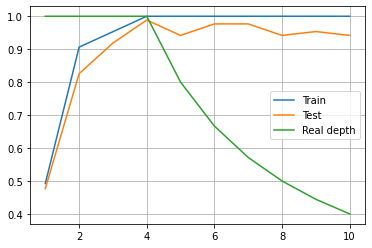

Random_state:  1


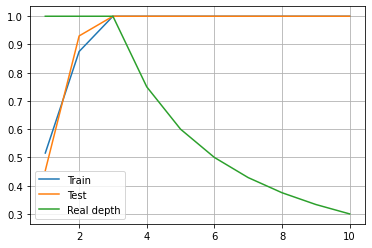

Random_state:  2


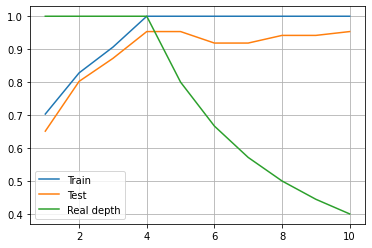

Random_state:  3


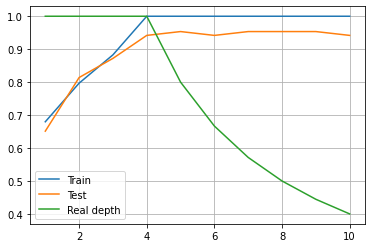

Random_state:  4


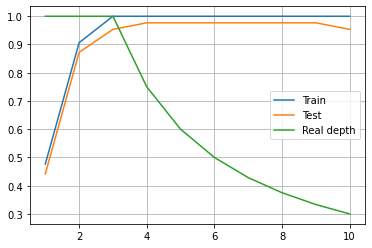

Random_state:  5


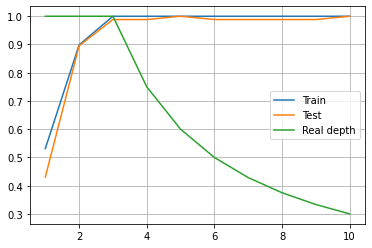

Random_state:  6


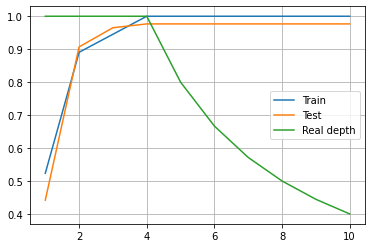

Random_state:  7


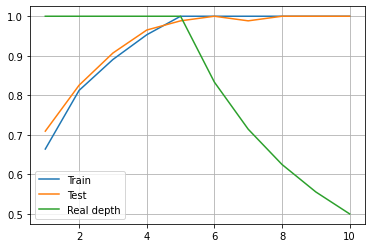

Random_state:  8


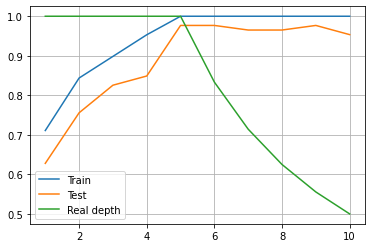

Random_state:  9


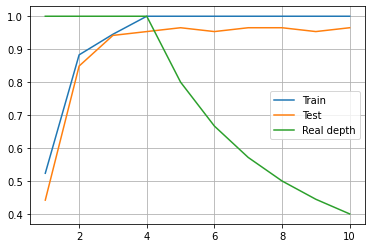

Random_state:  10


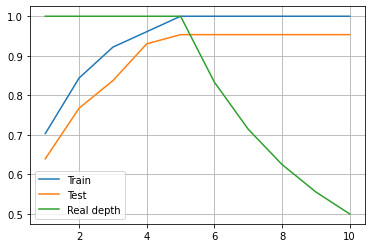

Статистика на различных разбиениях
Лучший результат: 1.0
Худший результат: 0.9534883720930233


In [99]:
# зависимоть результатов от глубины дерева на различных разбиениях 
results=[]
for i in range(0,11):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.40,   # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
  models = []
  train_accuracy = []
  test_accuracy = []
  current_depth = []

  max_depth = list(range(1, 11))
  for depth in max_depth:
    j=0;
  
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    model.fit(X_train, Y_train)
    models.append(model)
    test_accuracy.append(model.score(X_test, Y_test))
    train_accuracy.append(model.score(X_train, Y_train))
    current_depth.append(model.get_depth()/depth)

    
  print('Random_state: ', i)
  plt.plot(max_depth, train_accuracy, label='Train')
  plt.plot(max_depth, test_accuracy, label='Test')
  plt.plot(max_depth, current_depth, label='Real depth')

  plt.legend(loc='Best')
  plt.grid()
  plt.show()
  test_accuracy.sort()
  results.append(test_accuracy[-1])

#диапозон качества
results.sort()
print("Статистика на различных разбиениях")
print("Лучший результат:", results[-1])
print("Худший результат:", results[0])


  


In [32]:
# Текстовое представление дерева

text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 69.00
|   |--- class: 1
|--- feature_0 >  69.00
|   |--- feature_0 <= 147.00
|   |   |--- class: 2
|   |--- feature_0 >  147.00
|   |   |--- feature_0 <= 184.00
|   |   |   |--- feature_3 <= 3.02
|   |   |   |   |--- feature_0 <= 175.50
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_0 >  175.50
|   |   |   |   |   |--- class: 6
|   |   |   |--- feature_3 >  3.02
|   |   |   |   |--- class: 3
|   |   |--- feature_0 >  184.00
|   |   |   |--- class: 7



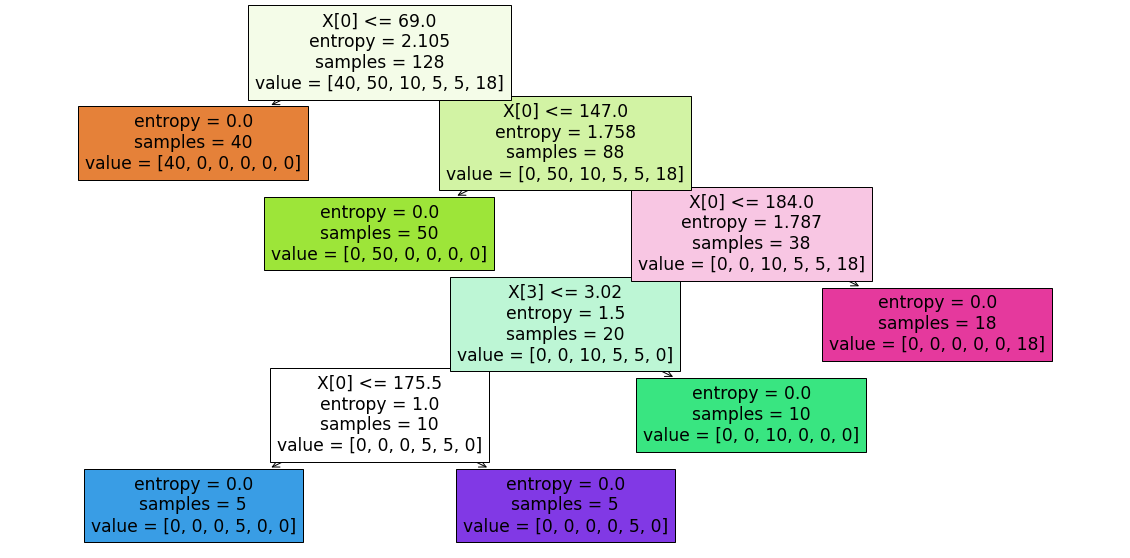

In [33]:
# Графическое представление дерева

fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(model, filled=True)

### Алгоритм "Случайный лес" (ансамбль деревьев)

1. Количество деревьев (n_estimators) нужно подбирать, т.к. большое их количество увеличивает качество на обучении, но на контроле, может быть меньше или не меняться вовсе, при этом время обучении возрастает.
2. Важным параметров является количество признаков (max_features), которые участвуют в построении правила разделения. Обычно для классификации используется $\sqrt{n}$, где n – общее количество признаков. Параметр является важным, т.к. при его увеличении деревья становятся похожими друг на друга.
3. Параметр глубина деревьев (max_depth) можно не подбирать, т.к. деревья сами настраивают его. Но если выборка слишком шумная, рекомендуется не использовать слишком глубокие деревья.

In [100]:
# Применение алгоритма классификации

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.4,   # Процент элементов в контрольной выборке
                                                    random_state = 1)

# Критерии информативности: энтропийный (entroy) и Джини (gini)
model = RandomForestClassifier(criterion='entropy', n_estimators=6, max_features=9, random_state=0, max_depth=3) 
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  1.0
Test :  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00        13

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



Random_state:  0


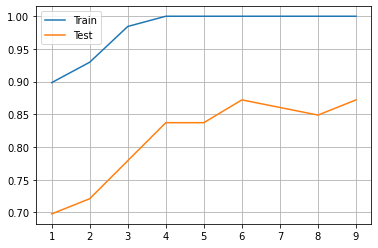

Random_state:  1


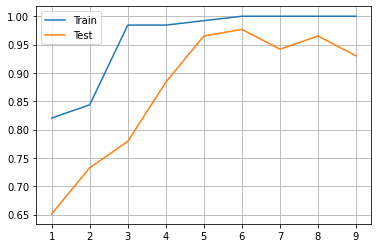

Random_state:  2


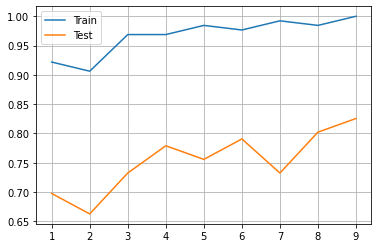

Random_state:  3


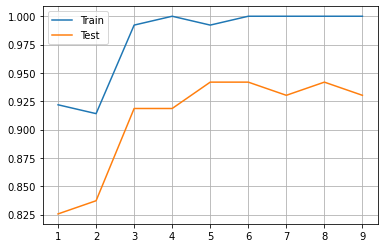

Random_state:  4


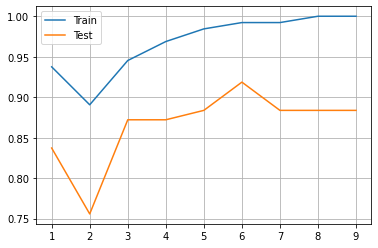

Random_state:  5


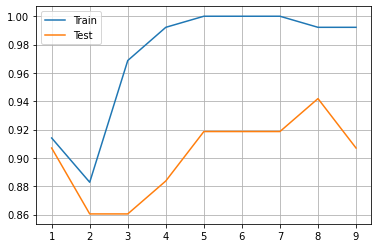

Random_state:  6


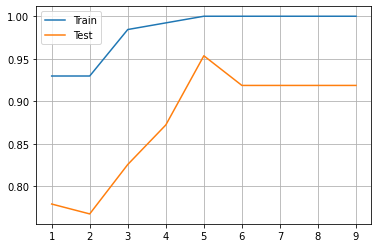

Random_state:  7


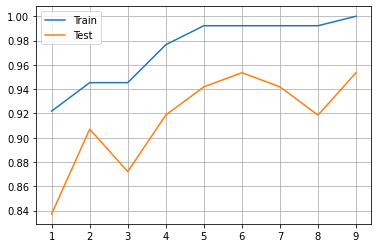

Random_state:  8


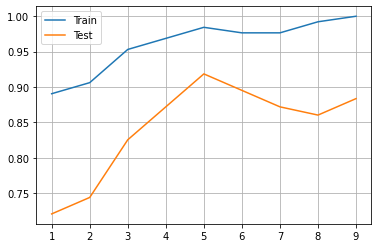

Random_state:  9


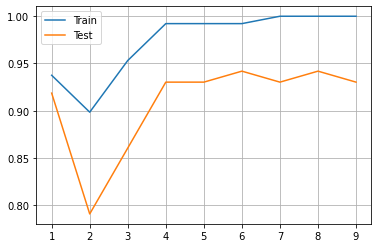

Random_state:  10


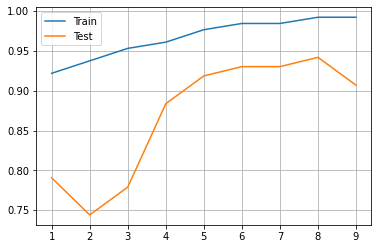

In [ ]:
# Зависимость результата от количества деревьев на различных разбиениях
for i in range(0,11):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.40,   # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
  models = [] 
  scores_train = []
  scores_test = []
  n_estimators = list(range(1, 10))

  for estimators in n_estimators:
      model = RandomForestClassifier(criterion='entropy', n_estimators=estimators, random_state=0)
      model.fit(X_train, Y_train)
      models.append(model)
      scores_test.append(model.score(X_test, Y_test))
      scores_train.append(model.score(X_train, Y_train))
      
  print("Random_state: ", i)
  plt.plot(n_estimators, scores_train, label='Train')
  plt.plot(n_estimators, scores_test, label='Test')

  plt.legend(loc='best')
  plt.grid()
  plt.show()

Random_state:  0


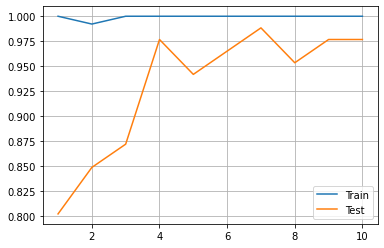

Random_state:  1


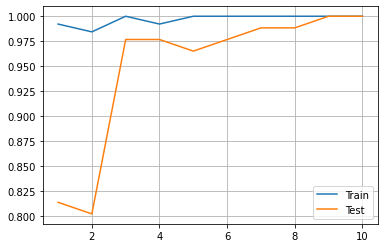

Random_state:  2


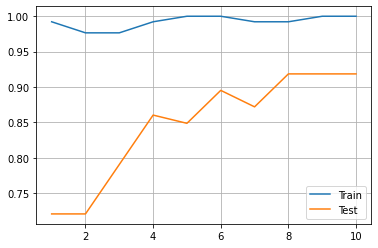

Random_state:  3


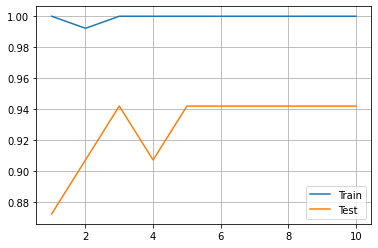

Random_state:  4


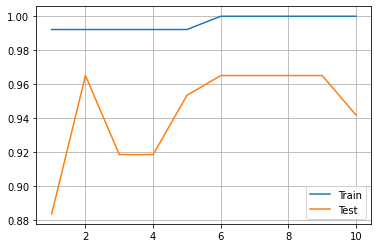

Random_state:  5


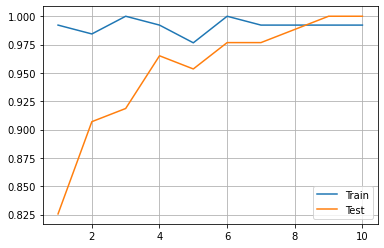

Random_state:  6


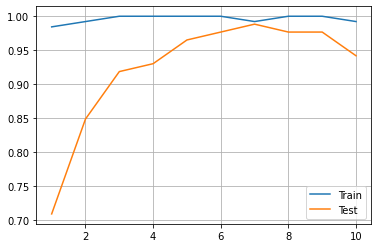

Random_state:  7


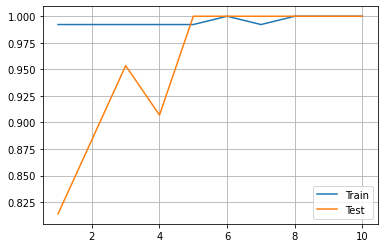

Random_state:  8


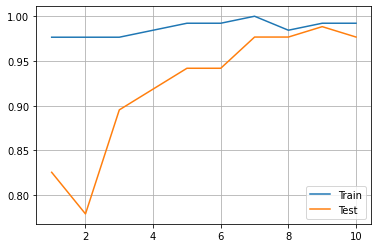

Random_state:  9


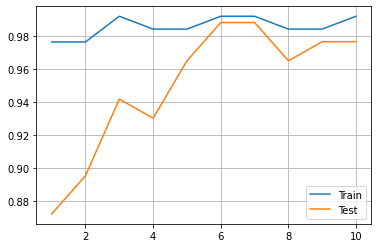

Random_state:  10


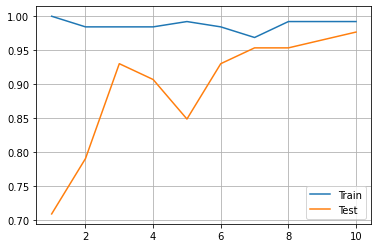

In [38]:
# Зависимость качества от числа признаков при расщеплении на различных разбиениях
for i in range(0,11):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.40,   # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
  models = []
  scores_train = []
  scores_test = []
  max_features = list(range(1, 11))
  for features in max_features:
      model = RandomForestClassifier(criterion='entropy', n_estimators=6, 
                                     max_features=features, random_state=0)
      model.fit(X_train, Y_train)
      models.append(model)
      scores_test.append(model.score(X_test, Y_test))
      scores_train.append(model.score(X_train, Y_train))
  print("Random_state: ", i)
  plt.plot(max_features, scores_train, label='Train')
  plt.plot(max_features, scores_test, label='Test')

  plt.legend(loc='Best')
  plt.grid()
  plt.show()

In [98]:
# Зависимоть результатов от n_estimators и max_features при различных разбиениях
results=[]
for r_s in range(1,11):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                   test_size = 0.4,   # Процент элементов в контрольной выборке
                                                   random_state = r_s)  # Фиксация разбиения на обучение и контроль
    n_estimators = list(range(1, 12))
    m_features=list(range(1, 11))
    combo = [0, 0]
    i=1
    models = []
    train_accuracy = []
    test_accuracy = []
    if r_s==1:
      print("Результаты для первого разбиения")

    for estimators in n_estimators:
      for features in m_features:
        model = RandomForestClassifier(criterion='entropy', n_estimators=estimators, max_features=features, random_state=0)
        model.fit(X_train, Y_train)
        test_accuracy.append(model.score(X_test, Y_test))
        train_accuracy.append(model.score(X_train, Y_train))

        if combo[1]<=model.score(X_test, Y_test): 
           combo=[model.score(X_train, Y_train), model.score(X_test, Y_test), estimators, features]
        
        if r_s==1:
          if model.score(X_test, Y_test)==1.00:
            print('"Лучший" результат №', i )
            i=i+1
            print('Train: ', combo[0])
            print('Test: ', combo[1])
            print('n_estimators: ', combo[2])
            print('max_features: ', combo[3], '\n')

    test_accuracy.sort()
    results.append(test_accuracy[-1])

#диапозон качества
results.sort()
print("Статистика на различных разбиениях: ")
print("Лучший результат:", results[-1])
print("Худший результат:", results[0])   



Результаты для первого разбиения
"Лучший" результат № 1
Train:  1.0
Test:  1.0
n_estimators:  1
max_features:  8 

"Лучший" результат № 2
Train:  1.0
Test:  1.0
n_estimators:  1
max_features:  9 

"Лучший" результат № 3
Train:  1.0
Test:  1.0
n_estimators:  1
max_features:  10 

"Лучший" результат № 4
Train:  0.984375
Test:  1.0
n_estimators:  3
max_features:  5 

"Лучший" результат № 5
Train:  0.9921875
Test:  1.0
n_estimators:  5
max_features:  5 

"Лучший" результат № 6
Train:  1.0
Test:  1.0
n_estimators:  6
max_features:  9 

"Лучший" результат № 7
Train:  1.0
Test:  1.0
n_estimators:  6
max_features:  10 

"Лучший" результат № 8
Train:  1.0
Test:  1.0
n_estimators:  7
max_features:  9 

"Лучший" результат № 9
Train:  1.0
Test:  1.0
n_estimators:  7
max_features:  10 

"Лучший" результат № 10
Train:  1.0
Test:  1.0
n_estimators:  8
max_features:  9 

"Лучший" результат № 11
Train:  1.0
Test:  1.0
n_estimators:  8
max_features:  10 

"Лучший" результат № 12
Train:  1.0
Test:  1.0
n

---


## Заключение

### 1. Алгорим "Решающее дерево"
При различных разбиениях результат колеблется в пределах 95-100% верных ответов, минимальный процент разбиения в тестовой выборке для достижения 100% результата на контрольной выборке это - 55%. Но для более стабильных результатов возьмем 40% элементов в контрольной выборке.
* Критерий информативности: criterion=entropy
* Глубина дерева: max_depth = 3
* Качество на обучающей выборке: 100%
* Качество на контрольной выборке: 100%


### 2. Алгоритм "Случайный лес"
Качество на контрольной выборке на различных разбиениях колеблется в пределах 95-100%. Параметры для достижения лучшего результата можно выбрать несколькими способами, один из вариантов: 
* Количество деревьев: n_estimators = 6
* Признаки для разделения: max_features = 9
* Качество на обучающей выборке: 100%
* Качество на контрольной выборке: 100%

### 3. Вывод

Оба метода при различных разбиениях показывали наилучший результат - 100% качества как на обучающей, так и на контрольной выборке. Качество на контрольной выборке на различных разбиениях также одинаковое (95-100%) у обоих алгоритмов.